# Test Evaluation Metrics

During evaluation when training the model, images are put into `metrics/PRED_DIR/` and `metrics/TARG_DIR/`, so this file is used to visually test the results.

In [93]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import glob
import os
import random

In [99]:
TYPE = "post" # localization or damage
PATH = "./data/train_gt/*{}*".format(TYPE)

In [100]:
# image_names = ["mexico-earthquake_00000007_pre_disaster.png"]
image_names = [os.path.basename(path) for path in glob.glob(PATH)]
image_name = image_names[random.randint(0, len(image_names) - 1)]
print("image_name: {}".format(image_name))

image_name: tuscaloosa-tornado_00000221_post_disaster.png


In [101]:
targ_image = cv2.imread("./data/train_gt/{}".format(image_name))
orig_image = cv2.imread("./data/train/images/{}".format(image_name))

In [102]:
def get_image_with_class_value(image, value):
    return np.where(image == value, 1, 0).astype("uint8") * 255

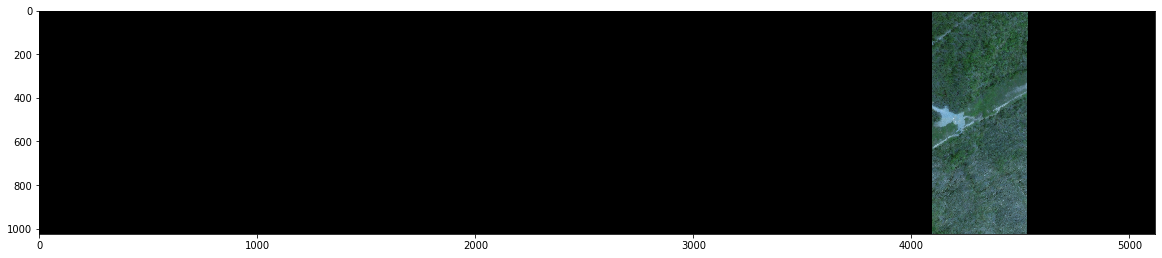

In [103]:
if TYPE == "pre":
    image = np.hstack([orig_image, targ_image * 255])
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
elif TYPE == "post":
    image = np.hstack([
        get_image_with_class_value(targ_image, 1),
        get_image_with_class_value(targ_image, 2),
        get_image_with_class_value(targ_image, 3),
        get_image_with_class_value(targ_image, 4),
        orig_image])
    plt.figure(figsize=(20, 10))
    plt.imshow(image)